In [8]:
%pip install nltk
%pip install emoji
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install Counter

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import ast 
import nltk 
import emoji


In [14]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans', 'Segoe UI Emoji', 'Apple Color Emoji', 'Noto Color Emoji', 'Symbola']

# Asegurarnos de que los caracteres Unicode (como emojis) se rendericen correctamente
plt.rcParams['axes.unicode_minus'] = False

# Configuración 

In [15]:
ruta_base = os.path.dirname(os.getcwd())
input_folder = 'data_processed' 
input_filename = 'fifa_tweets_clean.csv' 
input_csv_file = os.path.join(ruta_base,input_folder, input_filename)

# Cargar las stopwords si es necesario (para calcular longitud de tokens) 

In [16]:
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except (nltk.downloader.DownloadError, LookupError):
    print("Recursos de NLTK ('punkt', 'stopwords') no encontrados. Descargando...")
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)

Cargando dataset procesado desde 'c:\Users\oscar\Documents\Semestre6\discretas\ti2-2025-1-lora_team\data_processed\fifa_tweets_clean.csv' para EDA...
Dataset procesado cargado exitosamente.
Número de filas cargadas: 22524
------------------------------
Información básica del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date Created      22524 non-null  object
 1   Number of Likes   22524 non-null  int64 
 2   Source of Tweet   22524 non-null  object
 3   Tweet             22524 non-null  object
 4   Sentiment         22524 non-null  object
 5   sentiment_label   22524 non-null  int64 
 6   test_clean        22524 non-null  object
 7   processed_tokens  22524 non-null  object
 8   hastag            22524 non-null  object
 9   emoji_chars       22524 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.7+ MB
----

C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3252441119.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=sentiment_counts.index, palette='viridis')


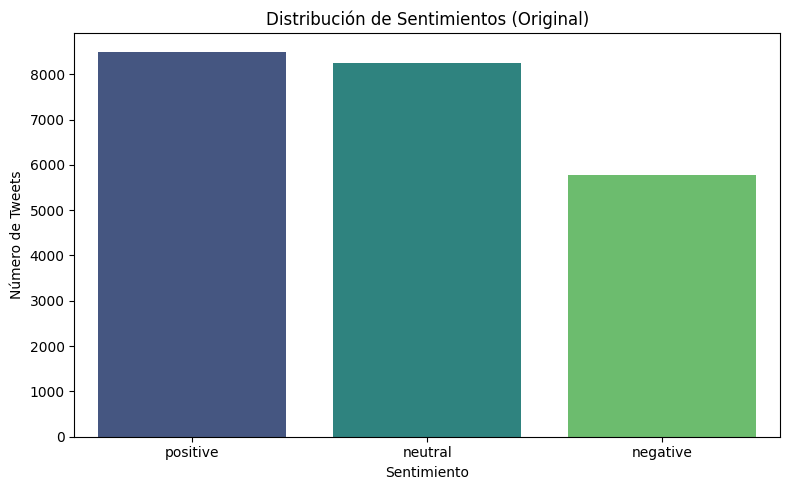


Distribución de Sentimientos (Numerical Label):
sentiment_label
0    5784
1    8251
2    8489
Name: count, dtype: int64


C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3252441119.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=sentiment_label_counts.index, palette='viridis')


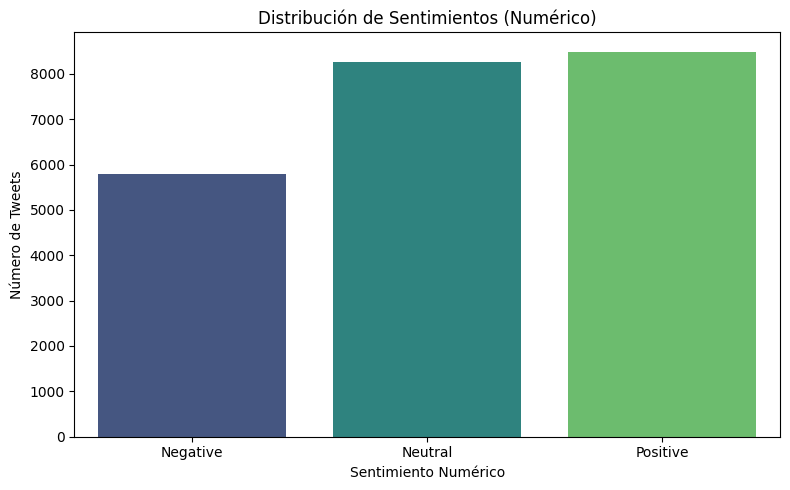


Análisis del Número de Likes:
count     22524.000000
mean         23.822856
std        2128.018705
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max      316867.000000
Name: Number of Likes, dtype: float64


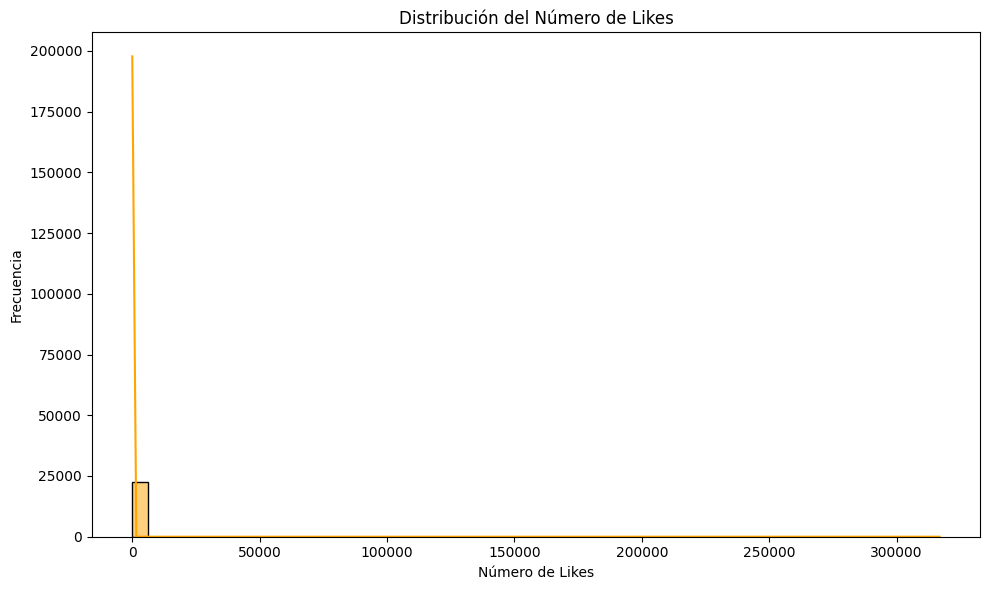


Análisis Temporal (Distribución de Tweets por Día):


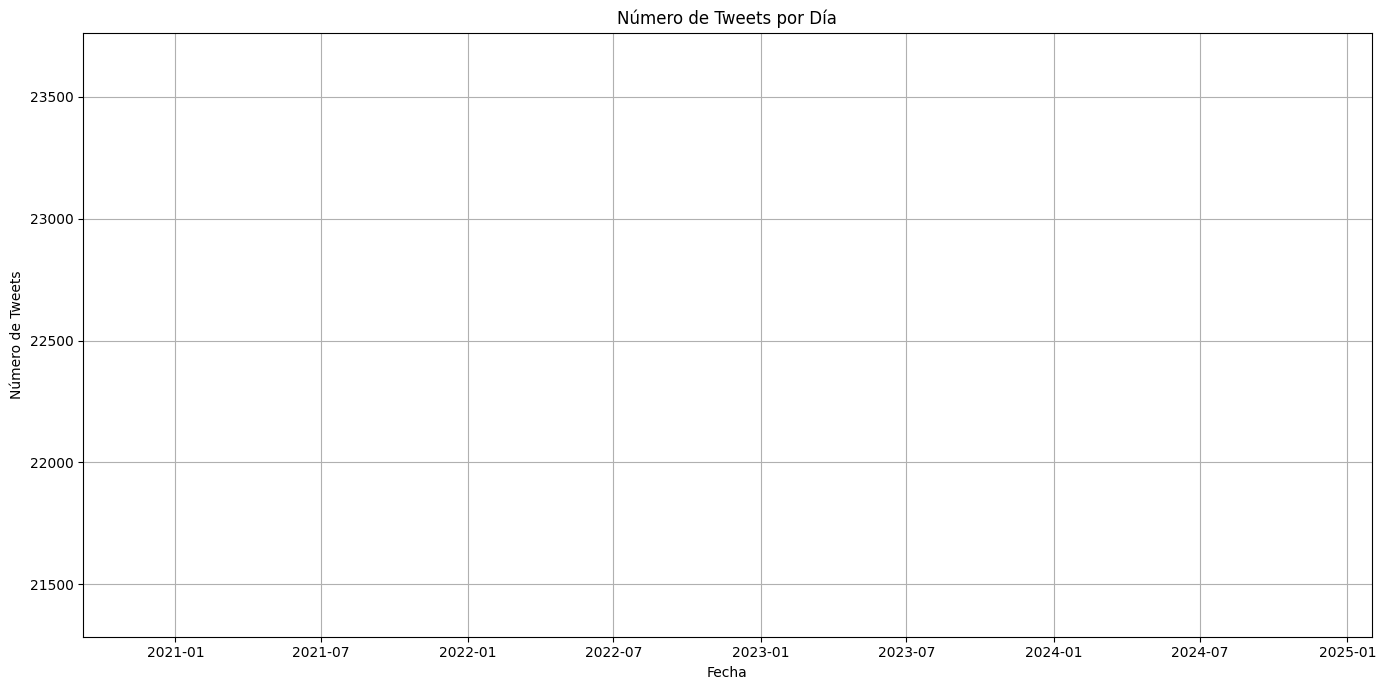


Distribución de Sources of Tweet:
Source of Tweet
Twitter for iPhone          9507
Twitter for Android         6820
Twitter Web App             4505
TweetDeck                    386
Twitter for iPad             240
Qualtrics Social Connect     165
Hootsuite Inc.               146
Buffer                        71
Instagram                     62
Tweetbot for iΟS              52
Twitter Media Studio          40
Twittimer                     37
IFTTT                         32
Sprout Social                 32
Twitter for Advertisers       25
Name: count, dtype: int64


C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3252441119.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.values, y=source_counts.index, palette='viridis')


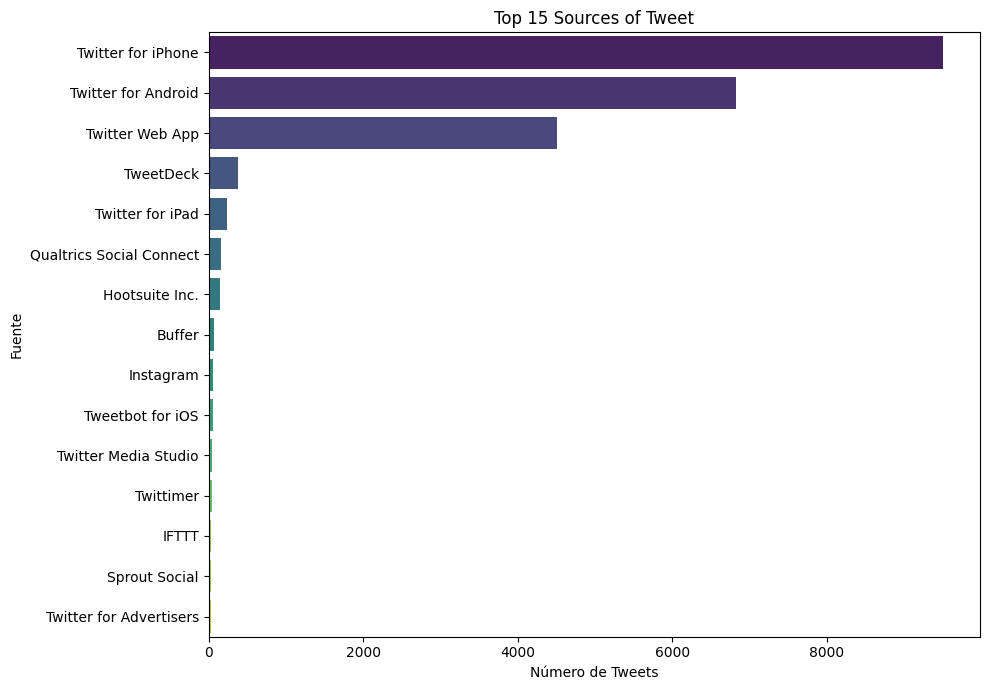


Análisis de Longitud de Texto y Número de Tokens:


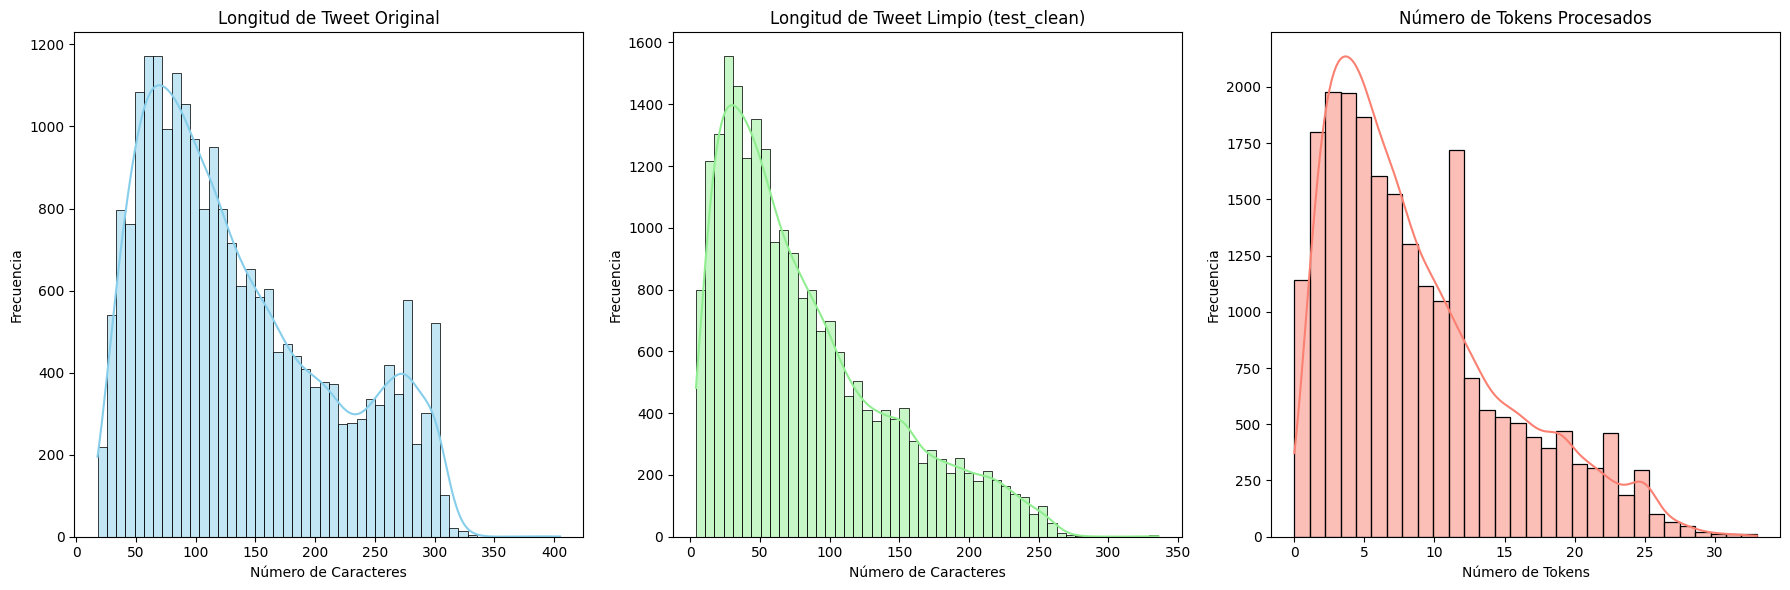


Longitud promedio (tokens procesados) por Sentimiento:
Sentiment
negative    9.437414
neutral     8.598109
positive    8.523737
Name: num_processed_tokens, dtype: float64

Palabras más comunes (desde processed_tokens):


C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3252441119.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


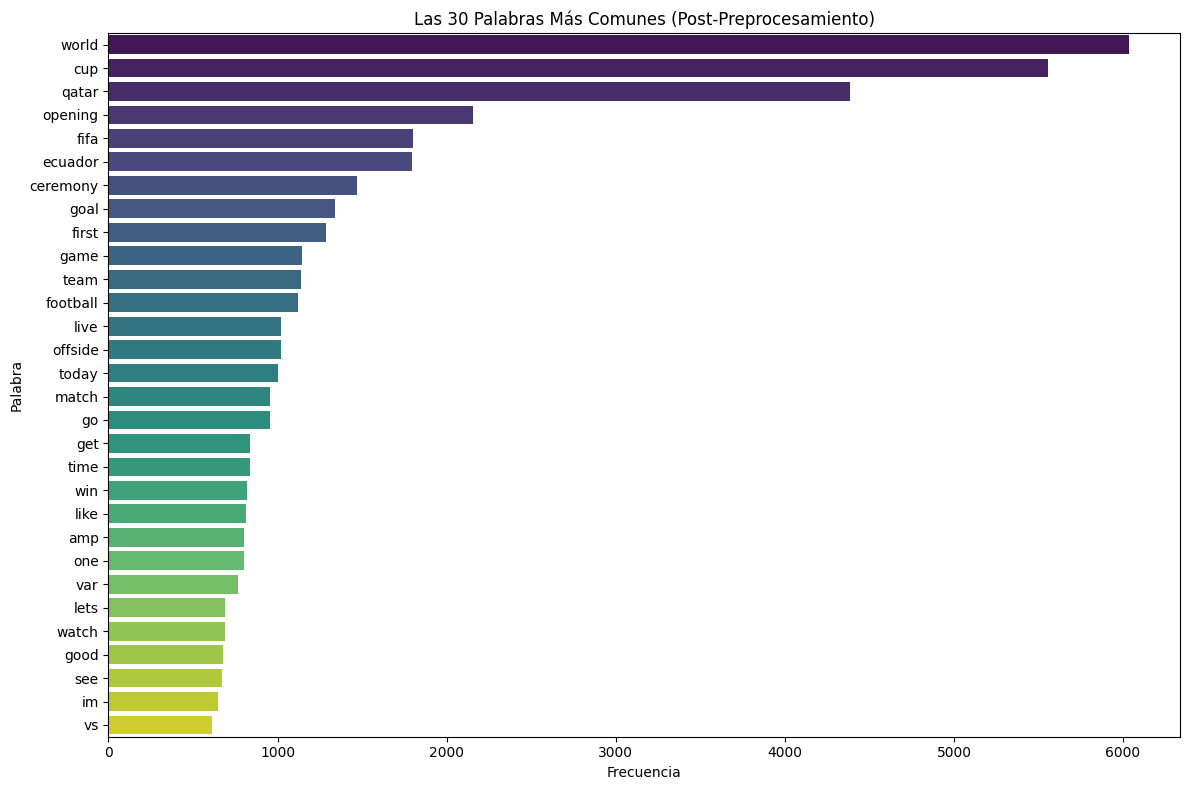


Hashtags más comunes:


C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3252441119.py:211: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ht_counts), y=list(hashtags), palette='viridis')


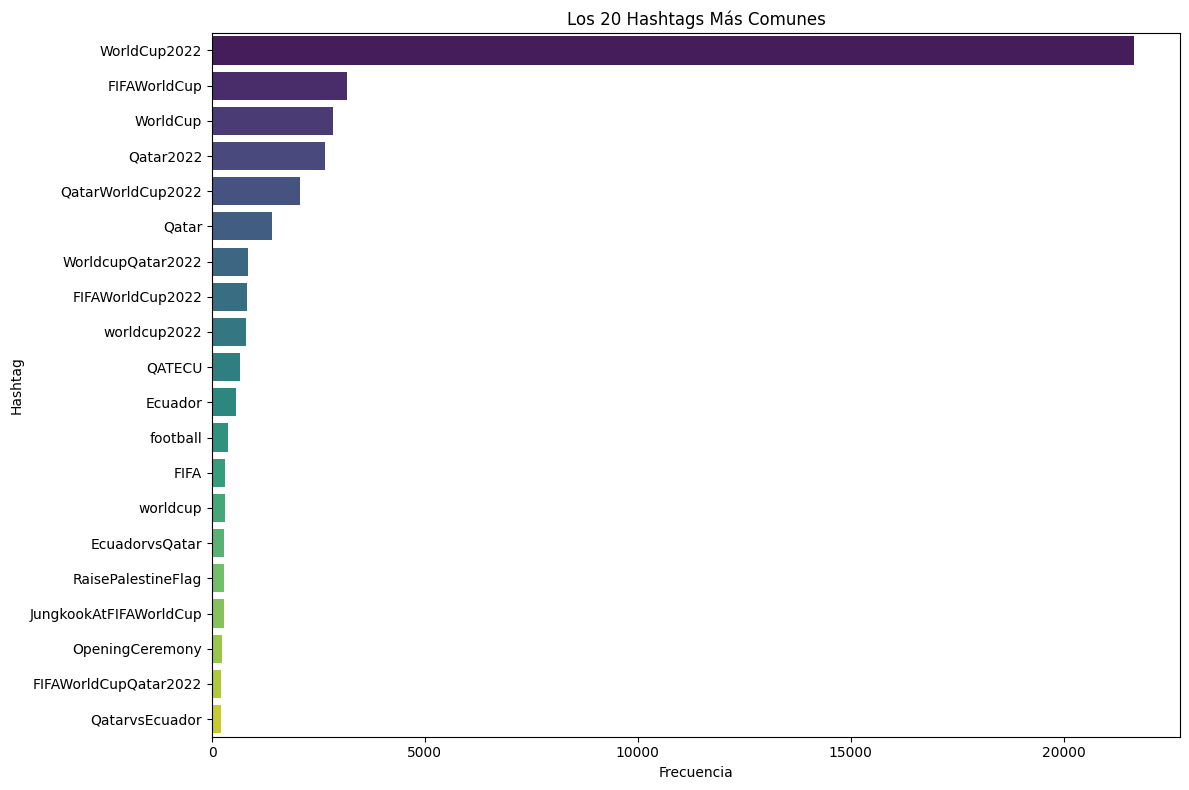

C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3252441119.py:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(labels), palette='viridis')


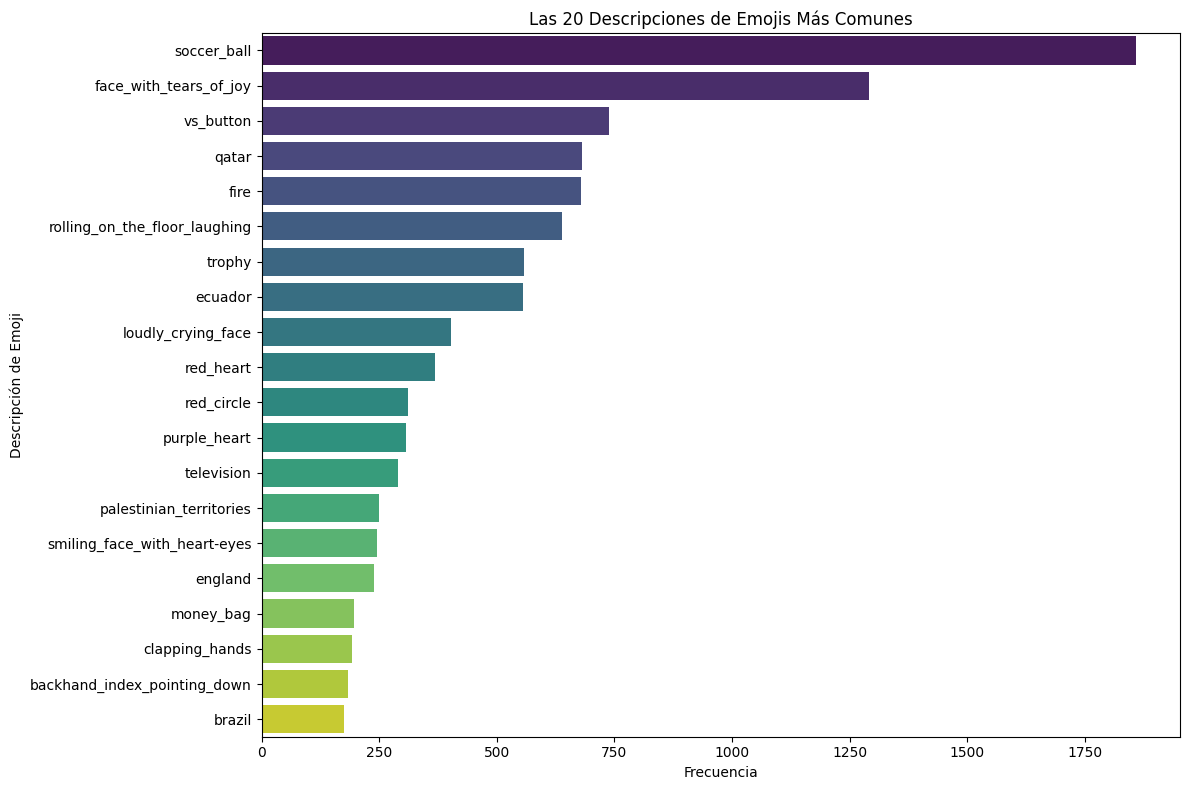


Relación entre Número de Likes y Sentimiento:


C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3252441119.py:245: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='Number of Likes', order=sentiment_counts.index, palette='viridis')


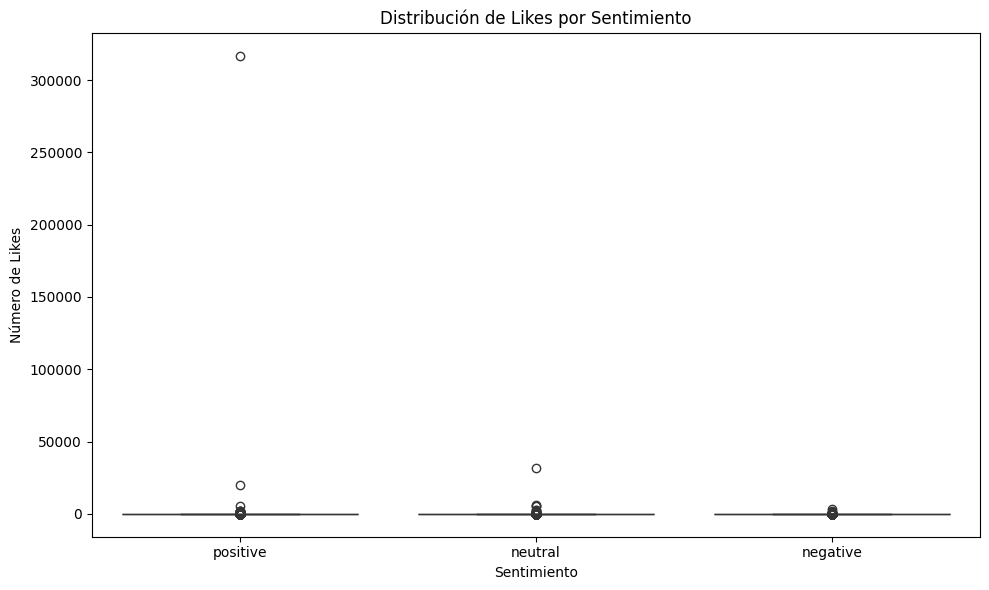

C:\Users\oscar\AppData\Local\Temp\ipykernel_9544\3252441119.py:256: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='num_processed_tokens', order=sentiment_counts.index, palette='viridis')


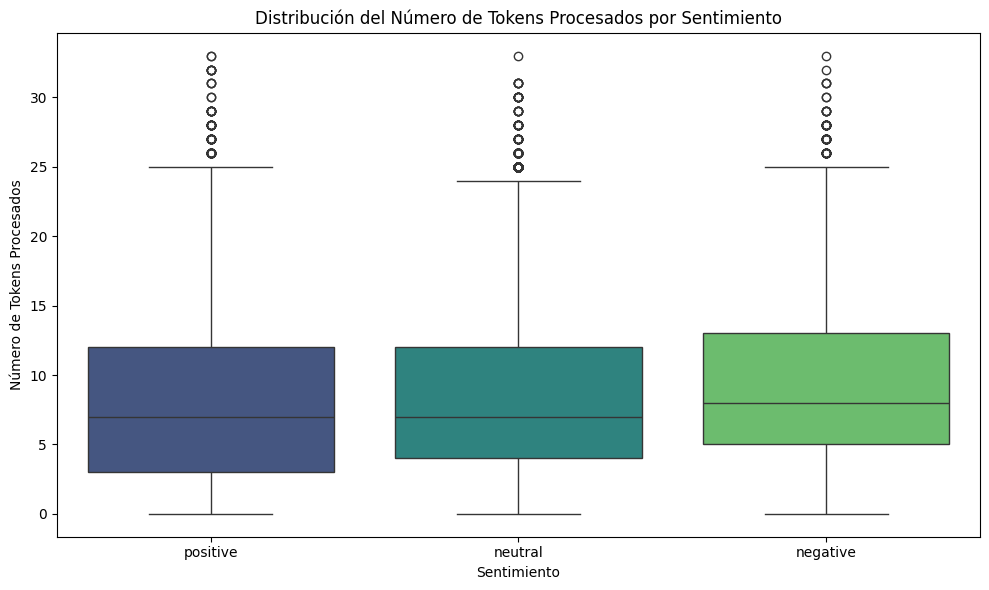

In [24]:
def get_emoji_descriptions(tweet):
    """Convierte emojis en texto descriptivo (ej: ❤️ -> red heart)."""
    if pd.isna(tweet):
        return []
    tweet_str = str(tweet)
    emoji_list_found = emoji.emoji_list(tweet_str)
    descriptions = []
    for emo in emoji_list_found:
        description = emoji.demojize(emo['emoji'], delimiters=("", "")).lower()
        descriptions.append(description)
    return descriptions



# --- Cargar el dataset procesado ---
print(f"Cargando dataset procesado desde '{input_csv_file}' para EDA...")
try:
    # Al leer un CSV, las columnas que eran listas necesitan ser convertidas.
    # *** AHORA INCLUYE LA COLUMNA 'emojis' EN EL CONVERTER ***
    df = pd.read_csv(
        input_csv_file,
        encoding='utf-8',
        converters={
            'hastag': lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip().startswith('[') else [],
            'emoji_chars': lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip().startswith('[') else [],
            # *** AÑADIMOS 'emojis' AL CONVERTER ***
            'emojis': lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip().startswith('[') else [],
            'processed_tokens': lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip().startswith('[') else []
        }
    )

    print("Dataset procesado cargado exitosamente.")
    print(f"Número de filas cargadas: {len(df)}")
    print("-" * 30)

except FileNotFoundError:
    print(f"Error: El archivo procesado '{input_csv_file}' no fue encontrado.")
    print(f"Asegúrate de que el script de preprocesamiento se ejecutó correctamente y generó este archivo en la carpeta '{input_folder}'.")
    sys.exit(1)
except Exception as e:
    print(f"Error al cargar el archivo procesado: {e}")
    print("Asegúrate de que el archivo no esté corrupto y que las columnas de lista estén bien formadas.")
    sys.exit(1)

all_emoji_descriptions = []
for tweet in df['Tweet'].astype(str):
    all_emoji_descriptions.extend(get_emoji_descriptions(tweet))
    
    
# --- Verificaciones básicas y información del dataset ---
print("Información básica del dataset:")
df.info()
print("-" * 30)

print("\nPrimeras 5 filas del dataset:")
print(df.head())
print("-" * 30)

print("\nEstadísticas descriptivas para columnas numéricas:")
print(df.describe())
print("-" * 30)

# --- Análisis Exploratorio de Datos (EDA) ---
print("\n--- Iniciando Análisis Exploratorio de Datos (EDA) ---")

# 1. Distribución de Sentimientos (Original y Numérico)
print("\nDistribución de Sentimientos (Categorical):")
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', order=sentiment_counts.index, palette='viridis')
plt.title('Distribución de Sentimientos (Original)')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Tweets')
plt.tight_layout()
plt.show()

print("\nDistribución de Sentimientos (Numerical Label):")
# Asegurarse de manejar NaN en sentiment_label si existen (ej. por 'unknown')
sentiment_label_counts = df['sentiment_label'].value_counts(dropna=False).sort_index(na_position='last')
print(sentiment_label_counts)
plt.figure(figsize=(8, 5))
# Convertir a string para manejar NaN si seaborn no los ordena bien
sns.countplot(data=df, x='sentiment_label', order=sentiment_label_counts.index, palette='viridis')
plt.title('Distribución de Sentimientos (Numérico)')
# Etiqueta más informativa si se incluyó NaN
sentiment_labels_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
# Crea etiquetas para el eje x incluyendo 'NaN' si está presente
x_labels = [sentiment_labels_map.get(label, 'NaN') for label in sentiment_label_counts.index]
plt.xticks(ticks=range(len(x_labels)), labels=x_labels)

plt.xlabel('Sentimiento Numérico')
plt.ylabel('Número de Tweets')
plt.tight_layout()
plt.show()


# 2. Análisis del Número de Likes
print("\nAnálisis del Número de Likes:")
print(df['Number of Likes'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['Number of Likes'], bins=50, kde=True, color='orange')
plt.title('Distribución del Número de Likes')
plt.xlabel('Número de Likes')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


# 3. Análisis Temporal (Distribución de Tweets por Fecha/Tiempo)
print("\nAnálisis Temporal (Distribución de Tweets por Día):")
df['Date Created'] = pd.to_datetime(df['Date Created'], errors='coerce')
df['Date'] = df['Date Created'].dt.date
tweets_per_day = df.dropna(subset=['Date'])['Date'].value_counts().sort_index()

if not tweets_per_day.empty:
    plt.figure(figsize=(14, 7))
    tweets_per_day.plot(kind='line')
    plt.title('Número de Tweets por Día')
    plt.xlabel('Fecha')
    plt.ylabel('Número de Tweets')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos de fecha válidos para el análisis temporal.")


# 4. Análisis de Source of Tweet
print("\nDistribución de Sources of Tweet:")
source_counts = df['Source of Tweet'].fillna('Unknown').value_counts().head(15)
print(source_counts)
plt.figure(figsize=(10, 7))
sns.barplot(x=source_counts.values, y=source_counts.index, palette='viridis')
plt.title('Top 15 Sources of Tweet')
plt.xlabel('Número de Tweets')
plt.ylabel('Fuente')
plt.tight_layout()
plt.show()


# 5. Análisis de Longitud de Texto y Tokens
print("\nAnálisis de Longitud de Texto y Número de Tokens:")
# Recalculamos si no existen (deberían si el preprocessor se usó)
df['original_tweet_length'] = df['Tweet'].astype(str).apply(len)
df['clean_tweet_length'] = df['test_clean'].astype(str).apply(len)
# Asegurarse que 'processed_tokens' es lista antes de .apply(len)
df['num_processed_tokens'] = df['processed_tokens'].apply(lambda x: len(x) if isinstance(x, list) else 0)


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(df['original_tweet_length'].dropna(), bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Longitud de Tweet Original')
axes[0].set_xlabel('Número de Caracteres')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['clean_tweet_length'].dropna(), bins=50, kde=True, color='lightgreen', ax=axes[1])
axes[1].set_title('Longitud de Tweet Limpio (test_clean)')
axes[1].set_xlabel('Número de Caracteres')
axes[1].set_ylabel('Frecuencia')

sns.histplot(df['num_processed_tokens'].dropna(), bins=30, kde=True, color='salmon', ax=axes[2])
axes[2].set_title('Número de Tokens Procesados')
axes[2].set_xlabel('Número de Tokens')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print("\nLongitud promedio (tokens procesados) por Sentimiento:")
print(df.groupby('Sentiment')['num_processed_tokens'].mean())


# 6. Palabras más comunes (desde processed_tokens)
print("\nPalabras más comunes (desde processed_tokens):")
all_processed_words = [word for tokens_list in df['processed_tokens'] if isinstance(tokens_list, list) for word in tokens_list]

if all_processed_words:
    word_counts = Counter(all_processed_words)
    N = 30
    common_words = word_counts.most_common(N)

    if common_words:
        words, counts = zip(*common_words)
        plt.figure(figsize=(12, 8))
        sns.barplot(x=list(counts), y=list(words), palette='viridis')
        plt.title(f'Las {N} Palabras Más Comunes (Post-Preprocesamiento)')
        plt.xlabel('Frecuencia')
        plt.ylabel('Palabra')
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron palabras comunes para mostrar.")
else:
    print("No hay tokens procesados para analizar palabras comunes.")


# 7. Hashtags más comunes (desde hastag)
print("\nHashtags más comunes:")
all_hashtags = [ht for ht_list in df['hastag'] if isinstance(ht_list, list) for ht in ht_list]

if all_hashtags:
    hashtag_counts = Counter(all_hashtags)
    N_hashtags = 20
    common_hashtags = hashtag_counts.most_common(N_hashtags)

    if common_hashtags:
        hashtags, ht_counts = zip(*common_hashtags)
        plt.figure(figsize=(12, 8))
        sns.barplot(x=list(ht_counts), y=list(hashtags), palette='viridis')
        plt.title(f'Los {N_hashtags} Hashtags Más Comunes')
        plt.xlabel('Frecuencia')
        plt.ylabel('Hashtag')
        plt.tight_layout()
        plt.show()
    else:
        print("No se encontraron hashtags comunes para mostrar.")
else:
    print("No se encontraron hashtags en el dataset.")

# Contar los emojis más comunes
if all_emoji_descriptions:
    emoji_desc_counts = Counter(all_emoji_descriptions)
    N = 20
    common_desc = emoji_desc_counts.most_common(N)

    labels, counts = zip(*common_desc)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(counts), y=list(labels), palette='viridis')
    plt.title(f'Las {N} Descripciones de Emojis Más Comunes')
    plt.xlabel('Frecuencia')
    plt.ylabel('Descripción de Emoji')
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron descripciones de emojis para graficar.")



# Opcional: Relación entre Número de Likes y Sentimiento
print("\nRelación entre Número de Likes y Sentimiento:")
# Usar la columna original 'Sentiment' para el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sentiment', y='Number of Likes', order=sentiment_counts.index, palette='viridis')
plt.title('Distribución de Likes por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Likes')
# plt.ylim(0, 500) # Descomentar y ajustar si hay outliers extremos
plt.tight_layout()
plt.show()

# Opcional: Longitud de tokens procesados vs Sentimiento
plt.figure(figsize=(10, 6))
# Usar la columna original 'Sentiment' para el boxplot
sns.boxplot(data=df, x='Sentiment', y='num_processed_tokens', order=sentiment_counts.index, palette='viridis')
plt.title('Distribución del Número de Tokens Procesados por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Tokens Procesados')
plt.tight_layout()
plt.show()
